In [1]:
#Import necc. packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy.spatial as spa

In [2]:
# read data into data_set
data_set = np.genfromtxt("hw08_data_set.csv", delimiter = ",")
# get X 
X= data_set

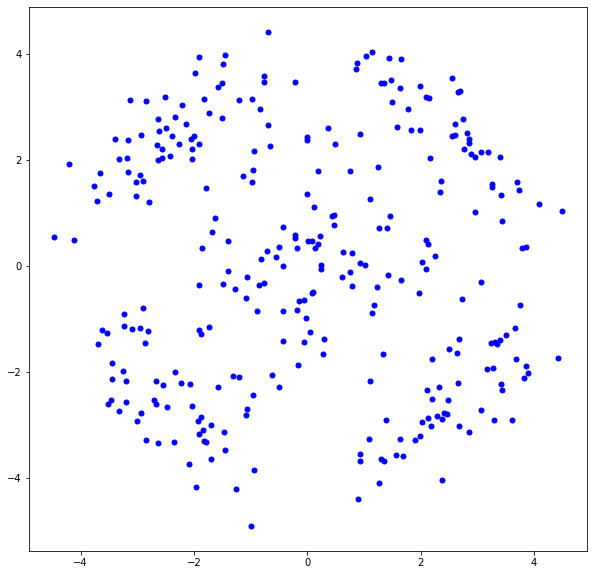

In [3]:
plt.figure(figsize = (10, 10))
plt.plot(X[:,0], X[:,1],"b." ,markersize = 10)


## 2: Connectivity Matrix 

In [4]:
#plot function that takes data set and connectivity matrix, 
#adds lines between connected points
#plots data set
def plot_connect(X,B):
    plt.figure(figsize = (10, 10))
    
    N = X.shape[0]
    for i in range(N):
        for j in range(i+1, N):
            if B[i][j] == 1:
                x1_vals = [X[i][0], X[j][0]]
                x2_vals = [X[i][1], X[j][1]]
                plt.plot(x1_vals,x2_vals, "ko-", alpha= 0.3)
    plt.plot(X[:,0], X[:,1],"k." ,markersize = 10)
    
    plt.xlabel("x1")
    plt.ylabel("x2")
#connectivity matrix calculator that takes data set and limit for distance
#creates a symmetric matrix B of dim NxN 
def connectivity_matrix(X, delta = 1.25):
    N = X.shape[0]
    B = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            dist = euclidean_distance(X[i],X[j])
            if (dist< delta):
                
                B[i][j]=1
                B[j][i] = 1
    return B
#calculates euclidean distance between 2 2D points
def euclidean_distance (x1, x2):
    x11 = x1[0]
    x12 = x1[1]
    
    x21= x2[0]
    x22 =x2[1]
    
    distance = math.sqrt((x11-x21)**2 + (x12-x22)**2)
    return distance
    

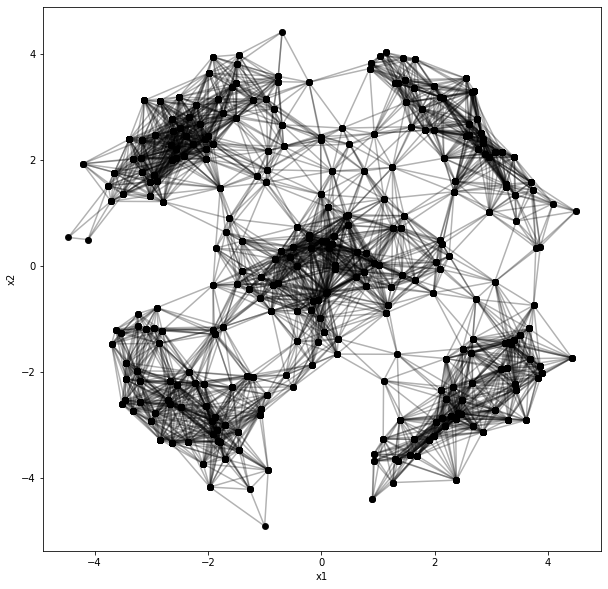

In [5]:
B = connectivity_matrix(X) 
plot_connect(X,B)


## 3: Neighbourhood and Laplacian Symmetric

In [6]:
def degree_matrix(B):
    N = B.shape[0]
    D= np.zeros((N,N))
    
    for i in range(N):
        total_neighbours = np.sum(B[i])
        D[i][i] = total_neighbours
    return D

def laplacian_symmetric(B,D):
    N = B.shape[0]
    I = np.eye(N)
    
    inv_D = np.linalg.inv(D)
    inv_sqrt_D = np.sqrt(inv_D)
    L_symmetric =I- (np.matmul(np.matmul(inv_sqrt_D,B),inv_sqrt_D))
    
    return L_symmetric
    





In [7]:
D =  degree_matrix(B)
L_symmetric = laplacian_symmetric(B,D)

## 4: Eigenvectors and Construct Z

In [8]:
def r_smallest_eigenvectors(L_symmetric, R):
    eigvals, eigvectors = np.linalg.eig(L_symmetric)
    idx = np.argsort(eigvals)[:R+1]
    return eigvectors[:,idx[1:R+1]]


In [9]:
R =5
Z = r_smallest_eigenvectors(L_symmetric, R)


## 5: K-Means Clustering

In [10]:
K = 5 
rows_init_centroids = [28, 142, 203, 270, 276]

In [11]:
#k-means clustering algorithm taken from lab-11 code
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K, False),]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)


centroids = Z[rows_init_centroids]
N = Z.shape[0]
memberships = update_memberships(centroids,Z)
iteration = 1
while True:

    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break
   

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break
   
    iteration += 1

## 6: Results

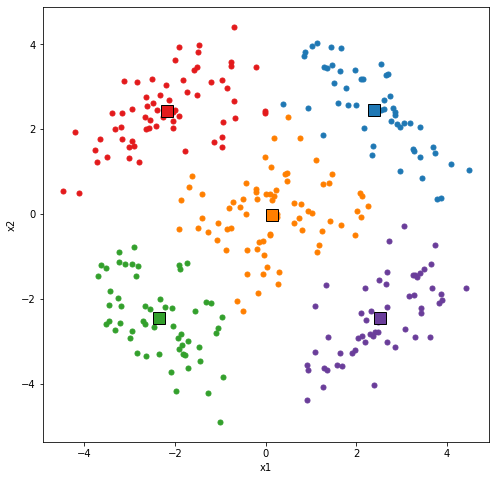

In [12]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")
    

plt.figure(figsize = (8,8)) 
X_centroids = update_centroids(memberships,X)
plot_current_state(X_centroids, memberships, X)
plt.show()